# **Salary prediction by linear regression, SVR , Random forest**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("/content/sample_data/Salary_Data.csv")

In [5]:
df.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32,Male,Bachelor's,5.0,90000
1,28,Female,Master's,3.0,65000
2,45,Male,PhD,15.0,150000
3,36,Female,Bachelor's,7.0,60000
4,52,Male,Master's,20.0,200000


In [6]:
df.tail()

,Age,Gender,Education Level,Years of Experience,Salary
373,35,Female,Bachelor's,8.0,85000
374,43,Male,Master's,19.0,170000
375,29,Female,Bachelor's,2.0,40000
376,34,Male,Bachelor's,7.0,90000
377,44,Female,PhD,15.0,150000


In [7]:
df.shape

(378, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  378 non-null    int64  
 1   Gender               378 non-null    object 
 2   Education Level      376 non-null    object 
 3   Years of Experience  375 non-null    float64
 4   Salary               378 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 14.9+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,378.0,37.425926,7.052743,23.0,31.25,36.0,44.0,53.0
Years of Experience,375.0,10.065333,6.563073,0.0,4.00,9.0,15.0,25.0
Salary,378.0,100662.301587,48230.335812,350.0,55000.00,95000.0,140000.0,250000.0


In [10]:
df.nunique()

Age                    31
Gender                  2
Education Level         3
Years of Experience    28
Salary                 36
dtype: int64

In [11]:
df.value_counts()

Age  Gender  Education Level  Years of Experience  Salary
33   Male    Bachelor's       4.0                  60000     8
29   Female  Bachelor's       2.0                  40000     8
28   Male    Bachelor's       2.0                  40000     8
35   Female  Bachelor's       8.0                  85000     7
44   Female  PhD              15.0                 150000    6
                                                            ..
36   Female  Bachelor's       8.0                  45000     1
                                                   85000     1
     Male    Bachelor's       7.0                  90000     1
                              8.0                  70000     1
53   Male    Master's         25.0                 180000    1
Name: count, Length: 269, dtype: int64

In [12]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        2
Years of Experience    3
Salary                 0
dtype: int64

In [13]:
df['Years of Experience']=df['Years of Experience'].fillna(df['Years of Experience'].mean())

In [14]:
df['Education Level']=df['Education Level'].fillna(df['Education Level'].mode()[0])

In [15]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Years of Experience    0
Salary                 0
dtype: int64

**Encoder** **String** **values**

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
ln=LabelEncoder()
df['Education Level']=ln.fit_transform(df['Education Level'])
df['Gender']=ln.fit_transform(df['Gender'])

In [18]:
df.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32,1,0,5.0,90000
1,28,0,1,3.0,65000
2,45,1,2,15.0,150000
3,36,0,0,7.0,60000
4,52,1,1,20.0,200000


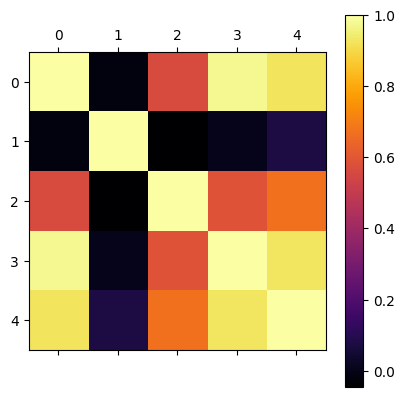

In [19]:
plt.matshow(df.corr(),cmap='inferno')
plt.colorbar()

***Split data***

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x=df.drop(columns='Salary')

In [22]:
x

,Age,Gender,Education Level,Years of Experience
0,32,1,0,5.0
1,28,0,1,3.0
2,45,1,2,15.0
3,36,0,0,7.0
4,52,1,1,20.0
...,...,...,...,...
373,35,0,0,8.0
374,43,1,1,19.0
375,29,0,0,2.0
376,34,1,0,7.0


In [23]:
y=df['Salary']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

**Linear Regression**

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
pred_y=lr.predict(x_test)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [29]:
print(f"MSE = {mean_squared_error(y_test, pred_y)}")

MSE = 279543508.3608125


In [30]:
print(f"MAE = {mean_absolute_error(y_test, pred_y)}")

MAE = 11740.817522989202


**Support vector regression**

In [31]:
from sklearn.svm import SVR

In [32]:
sv=SVR()
sv.fit(x_train,y_train)

SVR()

In [33]:
pred_y_sv=sv.predict(x_test)

In [34]:
print(f"MAE = {mean_absolute_error(y_test,pred_y_sv)}")

MAE = 39581.16102294173


In [35]:
print(f"MAE = {mean_squared_error(y_test,pred_y_sv)}")

MAE = 2293900949.7255445


**Random Forest **

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rg=RandomForestRegressor(n_estimators=5)
rg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=5)

In [38]:
pred_y_rg=rg.predict(x_test)

In [39]:
print(f"MAE = {mean_squared_error(y_test,pred_y_rg)}")

MAE = 341764300.8954181


In [40]:
print(f"MAE = {mean_absolute_error(y_test,pred_y_rg)}")

MAE = 10936.72723475355
